In [1]:
from IPython.display import YouTubeVideo

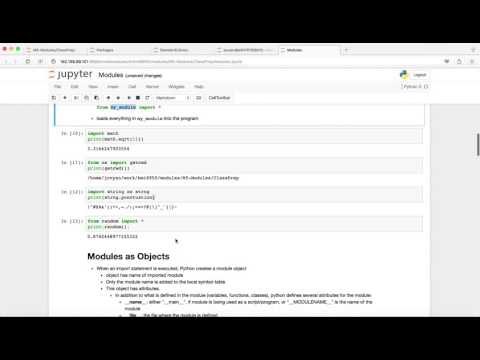

In [2]:
YouTubeVideo("t8eVJ-o8dEc", width=700)

# Modules

* Modules are a means of organizing functions, classes, constants, etc. that intrinsically belong together.
* They allow the core language to remain small while simultaneously facilitating language growth and expansion.

* We have already used several built-in modules
    * ``math``
    * ``random``
    

## Writing your own modules allows you to 
### Collect and reuse similar code:

* I organize my own code in the following modules
    * image analysis
    * statistical analysis
    * text processing
### Avoid colliding names 
* e.g. complex square root vs real square root

# What is a module?  
* A module is simply a Python file (a text file that ends with a `.py` extension). 
* How does a program access a module? 

```Python
import my_module
```
* loads the entire module ``my_module`` into the current program. 
* Happens only once!

```Python
from my_module import myFunction
```
* loads only function ``myFunction`` from the module ``my_module`` into the current program

```Python
import my_module as mm
```
* imports ``my_module`` but renames it mm

```Python
from my_module import *
```
* loads everything in ``my_module`` into the program

In [ ]:
import math
print(math.sqrt(11))

In [ ]:
from os import getcwd
print(getcwd())

In [ ]:
import string as strng
print(strng.punctuation)

In [ ]:
from random import *
print(random())

# Modules as Objects
* When an import statement is executed, Python creates a *module object*
    * object has name of imported module 
    * Only the module name is added to the local symbol table
    * This object has attributes. 
        * In addition to what is defined in the module (variables, functions, classes), python defines several attributes for the module:
			1. **`__name__`**: The value will be either 
                1. `__main__`, if module is being used as a script/program, or
                1. `__MODULENAME__` where `MODULENAME` is the name of the module/file, if we have imported the module
			1. **`__file__`**: the file where the module is defined
			1. **`__doc__`**: the doc string defined for the module

In [ ]:
print(math.__file__)
print(math.__name__)
print(math.__doc__)


In [ ]:
import math

print(dir(math))
# use "." "TAB" (after cell has first been evaluated/played)
math.acos?
help(math.cos)

## `sys.path`

`sys.path` is a list of directories where Python searches for modules.

In [ ]:
import sys
sys.path

## Creating a Module
* All you need to do is create a Python file (ending in `.py`) somewhere in your ``sys.path``
* The module can contain any Python object
### Here is an example
    * mdcrc.py
    
```Python
"""This module contains data and function relative to MDCRC 6521 course"""

import random
# just an interesting number
Chapernowne_number = 0.12345678910111213141516171819202122232425
students = \
    ["Samuel", "Tyler", "Helen", "Nickolas", "Matthew", "Scott",
     "Schuyler", "Nicole", "Sai", "Melissa", "Clifford", "Paris"]
teachers = ["Brian", "Keith"]


def selectStudentWithReplacement(students):
    """randomly select student from list students"""
    return random.choice(students)

def shufflePopStudents(students):
    """randomly select and remove a student from the list of students"""
    try:
        random.shuffle(students)
        return students.pop()
    except IndexError:
        return ""

def pair_groups(n_groups = 6):
    """ create a random pairing of the homework groups"""
    def _shuffle_pop(group1, groups):
        random.shuffle(groups)
        if groups[-1] != group1:
            match = groups.pop()
            return match, groups
        else:
            return _shuffle_pop(group1,groups)
    first = range(1,n_groups+1)
    second = first[:]
    return [(group,_shuffle_pop(group,second)) for group in first]

print("this is mdcrc.py")
```

In [3]:
with open("mdcrc.py","r") as f0:
    mdcrc = f0.read()
print(mdcrc)

"""This module contains data and function relative to MDCRC 6521 course"""

import random
# just an interesting number
Chapernowne_number = 0.12345678910111213141516171819202122232425
students = \
    ["Samuel", "Tyler", "Helen", "Nickolas", "Matthew", "Scott",
     "Schuyler", "Nicole", "Sai", "Melissa", "Clifford", "Paris"]
teachers = ["Brian", "Tom", "Eric"]


def selectStudentWithReplacement(students):
    """randomly select student from list students"""
    return random.choice(students)

def shufflePopStudents(students):
    """randomly select and remove a student from the list of students"""
    try:
        random.shuffle(students)
        return students.pop()
    except IndexError:
        return ""

def pair_groups(n_groups = 6):
    """ create a random pairing of the homework groups"""
    def _shuffle_pop(group1, groups):
        random.shuffle(groups)
        if groups[-1] != group1:
            match = groups.pop()
            return match, groups
        else:
         

In [ ]:
import sys
import os
sys.path

In [4]:

import mdcrc # NOTE: don't include the .py on the import statement
print(mdcrc.__file__)
print(mdcrc.__doc__)
print(mdcrc.__name__)
help(mdcrc)

this is mdcrc.py
/home/jovyan/work/6018_2017/modules/m8-modules/ClassPrep/mdcrc.py
This module contains data and function relative to MDCRC 6521 course
mdcrc
Help on module mdcrc:

NAME
    mdcrc - This module contains data and function relative to MDCRC 6521 course

FUNCTIONS
    pair_groups(n_groups=6)
        create a random pairing of the homework groups
    
    selectStudentWithReplacement(students)
        randomly select student from list students
    
    shufflePopStudents(students)
        randomly select and remove a student from the list of students

DATA
    Chapernowne_number = 0.12345678910111213
    students = ['Samuel', 'Tyler', 'Helen', 'Nickolas', 'Matthew', 'Scott'...
    teachers = ['Brian', 'Tom', 'Eric']

FILE
    /home/jovyan/work/6018_2017/modules/m8-modules/ClassPrep/mdcrc.py




## What if I change my module?
### If I import the module again do I see my chnages?
#### Experiment with mdcrc

Edit `mdcrc.py` by adding "Nick" and "Rich" to the list of teachers. Then reimport and look at `mdcrc.teachers`.

In [ ]:
import mdcrc
mdcrc.teachers

#### `mdcrc.teachers` remains unchanged in our notebook
#### An `import` statement is only executed once!

This second `import mdcrc` is ignored.

### [``importlib.reload``](https://docs.python.org/3/library/importlib.html)
* If you have changed a module and what to reload the modules
* **reload(my_module)**: Reloads my_module into the program. 
    * Any changes to my_module are now reflected in the program.
* Very useful as you develop and debug your programs.

In [ ]:
import importlib
importlib.reload(mdcrc)
mdcrc.teachers

## What is available in mdcrc?

### Any constants, functions, classes, etc. we have defined in mdcrc
### Any packages we've imported into mdcrc
#### Since mdcrc imports random (**import random**), **random** is also accessible through mdcrc

In [ ]:
mdcrc.random.randrange(0,10)


## Module Imports and ``sys.path``

In [ ]:
YouTubeVideo("kkYdJgJiXJ4", width=700)

### I've created a module named ``something_craziest.py``
* File is located in ./something_crazy/something_crazier

In [ ]:
import something_craziest

In [ ]:
import sys
import os
sys.path

### The location of ``something_craziest`` is not in my sys.path

In [ ]:
fdir = os.path.join(os.getcwd(),"something_crazy","something_crazier")
print(fdir in sys.path)
fdir

### But I can add it

In [ ]:
sys.path.append(fdir)

In [ ]:
import something_craziest

In [ ]:
# Call my_favoritethings from my module
something_craziest.my_favoritethings()

In [ ]:
sys.path.pop(-1)